In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#creating 100 samples
np.random.seed(0)
m = 100
X = np.linspace(0,10,m).reshape(m,1)
y = X + np.random.randn(m,1)

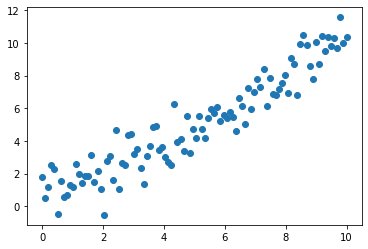

In [3]:
plt.scatter(X,y)

In [4]:
#---------------------Regression with sickit-learn
from sklearn.linear_model import LinearRegression

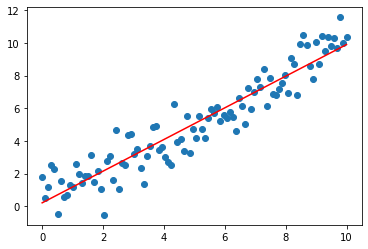

In [9]:
model = LinearRegression() #utilise la méthode des moindre carrés donc n'utilise pas d'hyperparamètres
model.fit(X, y)
model.score(X, y) #calcile le R² coeff de détermination

predictions = model.predict(X)
plt.scatter(X, y)
plt.plot(X, predictions, c='r')

In [1]:
#--------------------Classification with sickit-learn
import pandas as pd
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
titanic = titanic[['survived','pclass','sex','age']]
titanic.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [13]:
titanic.dropna(axis= 0, inplace=True)
titanic.describe()

<ipython-input-13-0bf37c5c33a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(axis= 0, inplace=True)


,survived,pclass,age
count,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118
std,0.491460,0.838250,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,1.000000,20.125000
50%,0.000000,2.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [14]:
titanic['sex'].replace(['male','female'], [0,1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
kn = KNeighborsClassifier(n_neighbors=2)

In [96]:
y = titanic['survived']

In [97]:
X = titanic.drop('survived', axis = 1)

In [98]:
kn.fit(X,y)

KNeighborsClassifier(n_neighbors=2)

In [99]:
kn.score(X,y)

0.8585434173669467

In [100]:
import matplotlib.pyplot as plt 
import numpy as np

In [110]:
# Méthode prédiction survie, utilisant notre modèle !!!!!!!!!!!!!!!!!!!!!!!!!!
def survie(model, pclass, sex, age):
    x= np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [111]:
survie(kn, 3, 0, 27)

[0]
[[0.5 0.5]]


In [112]:
#-----------arbre de décision
from sklearn import tree

In [124]:
dt = tree.DecisionTreeClassifier(splitter= 'random')

In [125]:
dt.fit(X, y)

DecisionTreeClassifier(splitter='random')

In [126]:
dt.score(X, y)

0.896358543417367

In [131]:
survie(dt, 3, 1, 23)

[0]
[[0.5 0.5]]


In [132]:
titanic.shape

(714, 4)